<a href="https://colab.research.google.com/github/minesaba/Python-Ciencia-de-Datos/blob/main/Copia_de_TPFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP FINAL

**Ejercicio 1**\
Buscar un dataset (que no sea de los trabajados en clases).

**Ejercicio 2**\
Realizar una introducción al dataset de que se trata, definir sus variables (Diccionario de datos).

**Ejercicio 3**\
Identificar el tipo de variable, decide justificando tu respuesta.

**Ejercicio 4**\
Detectar Valores Ausentes  y Valores Atípicos. Decidir si eliminarlos y el por que de la eleccion.

**Ejercicio 5**\
Realizar un analisis univariado y en base a esos graficos, sacar conclusiones.

**Ejercicio 6**\
Realizar analisis de matriz corelación y explicar qué variables están correlacionadas.

**Ejercicio 7**\
Sobre el Dataset elegido explique si se pueden reducir las dimensiones  y qué representa esas  nuevas variables.

**Para los que entregan en blanco**

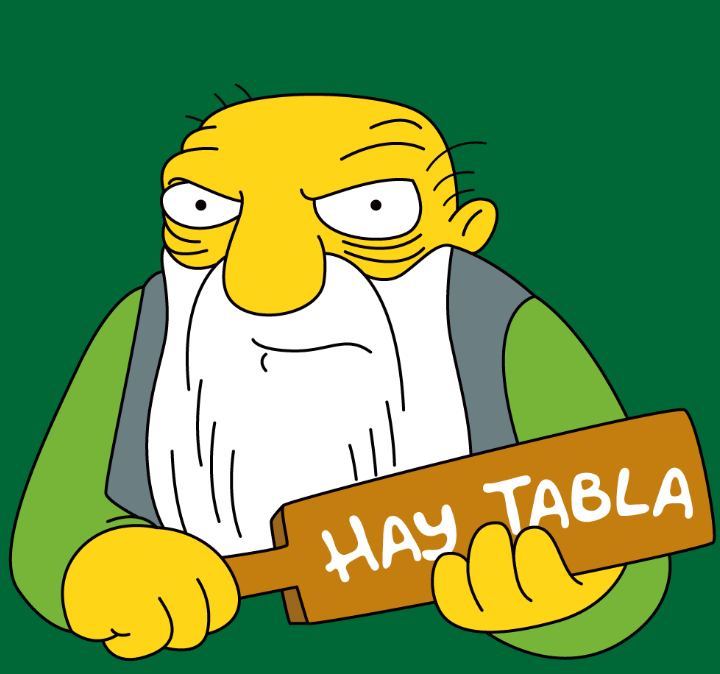

# RESPUESTAS

**Ejercicio 1**

**Aclaración**: Quiero aclarar que, como soy autodidacta en el análisis de datos, desde hace tiempo suelo bajar dataset para realizar análisis (de sitios oficiales) y, habitualmente, suelo encontrarme con problemas similares en los datos (que me impiden trabajarlos, tales como que no están limpios, normalizados o, bien, que no son compatibles los formatos de la información con los archivos -extensión csv-). Esto obstaculiza mi trabajo, por eso recurrí a un dataset de "adopciones" (que ya tenía en mi computadora, que se encuentra normalizado para poder trabajar con el mismo).

Elegí un dataset publicado en este enlace: https://data.buenosaires.gob.ar/dataset/adopciones

Puntualmente, elegí la temática adopciones porque soy abogada y la misma me interesa. Me parece desafiante contrastar el marco normativo con la realidad (es decir, los datos concretos).



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Guardé el archivo .cvs en este link: https://drive.google.com/file/d/1DZW945_y6rw1B9MlDjQSc3DJWQP6RZzc/view?usp=sharing

data = pd.read_csv('/content/adopciones-2019.csv')
print(data.head())

     fecha_inscripcion    fecha_nacimiento     genero subtipo_adopcion  edad
0  2019-01-03 14:29:50  1991-01-04 0:00:00   Femenino   Adopción Plena    27
1  2019-01-08 11:00:08  2002-03-23 0:00:00  Masculino   Adopción Plena    16
2  2019-02-12 14:25:10  2000-03-12 0:00:00   Femenino  Adopción Simple    18
3  2019-02-13 10:49:07  2005-03-24 0:00:00   Femenino   Adopción Plena    13
4  2019-02-18 14:44:01  1990-04-24 0:00:00   Femenino   Adopción Plena    28


**Ejercicio 2**

**INTRODUCCIÓN AL DATASET**

El conjunto de datos de este dataset contiene información sobre las adopciones celebradas en el año 2019, en la Ciudad Autónoma de Buenos Aires, datos como: fechas de inscripción, fechas de nacimiento, género, subtipo de adopción y edad de los adoptados.

**Diccionario**:

**fecha_inscripcion**: La fecha y hora en que se realizó la inscripción del proceso de adopción.

**fecha_nacimiento**: La fecha de nacimiento del adoptado.

**genero**: El género del adoptado, que puede ser "femenino" o "masculino".

**subtipo_adopcion**: El subtipo de adopción que se llevó a cabo, que puede ser "adopción plena", "adopción simple" o "adopción en el extranjero".

**edad**: La edad del adoptado al momento de la inscripción de la adopción.


**Ejercicio 3**

**TIPO DE VARIABLES** (del dataset)

**fecha_inscripcion**: Es una variable temporal, de tipo fecha.

**fecha_nacimiento**: Es una variable temporal, de tipo fecha.

**genero**: Es una variable categórica.

**subtipo_adopcion**: Es una variable categórica.

**edad**: Es una variable numérica.


In [ ]:
print(data.columns)

Index(['fecha_inscripcion', 'fecha_nacimiento', 'genero', 'subtipo_adopcion',
       'edad'],
      dtype='object')


**Ejercicio 4**

Detectar **valores ausentes** y **valores atípicos**

¿Los elimino? ¿Por qué?

In [ ]:
# Busco VALORES AUSENTES

valores_ausentes = data.isna().sum()
print(valores_ausentes)

fecha_inscripcion    0
fecha_nacimiento     0
genero               0
subtipo_adopcion     0
edad                 0
dtype: int64


No hay **valores ausentes**.

In [ ]:
# Busco VALORES ATÍPICOS

print(data['edad'].describe())

count    92.000000
mean     14.380435
std       8.692352
min       2.000000
25%       9.000000
50%      13.000000
75%      18.250000
max      54.000000
Name: edad, dtype: float64


Entiendo que los valores (**mean, std, min, 25%, 50%, 75%, max**) son normales.

Debido a que, si bien las adopciones suelen comprender, en su mayoría, a menores de edad; también, pueden ser adoptadas personas mayores. Esto último puede deberse al reconocimiento de situaciones de hecho (en las familias) que quieren formalizarse.

**Ejercicio 5**

**Análisis UNIVARIADO**



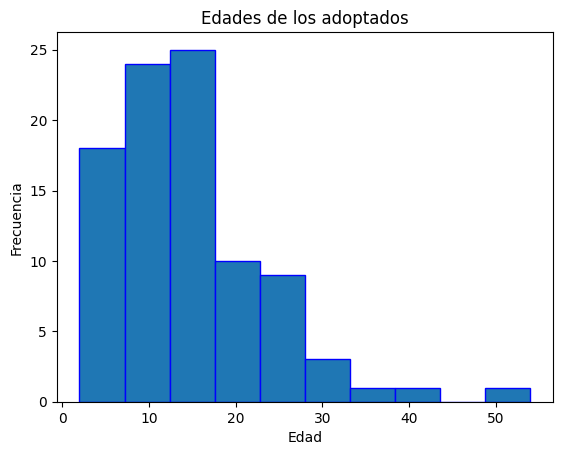

In [2]:
import matplotlib.pyplot as plt

# Histograma
plt.hist(data['edad'], bins=10, edgecolor='blue')
plt.title('Edades de los adoptados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


**Conclusiones**

La mayoría de los adoptados son menores de edad, a partir de los dos años.

Sin embargo, hay adoptados de hasta 54 años de edad (ya que pueden realizarse adopciones con adoptados de cualquier edad, aunque lo más habitual es que esto ocurra cuando el adoptado sea menor, lo que se desprende de este registro del año 2019).

Como mencioné previamente, las adopciones que conciernen a adoptados mayores de edad pueden deberse al reconocimiento de situaciones de hecho (en las familias) que quieren formalizarse.

En definitiva, entiendo que todos estos valores son coherentes con la realidad.

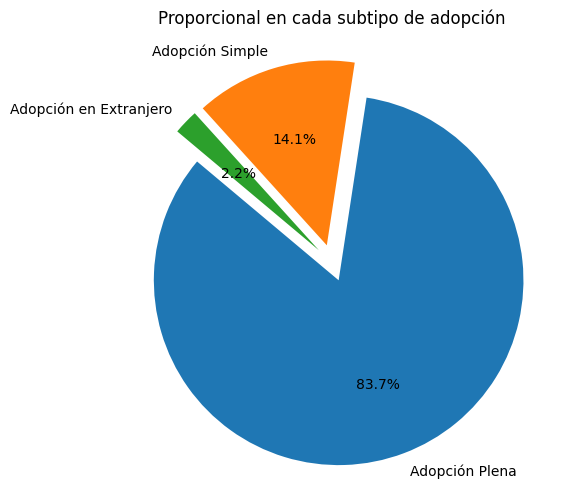

In [ ]:
#Gráfico de torta

tipo_contados = data['subtipo_adopcion'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(tipo_contados, labels=tipo_contados.index, autopct='%1.1f%%', startangle=140, explode=[0.1, 0.1, 0.1])
plt.title("Proporcional en cada subtipo de adopción")
plt.show()

In [ ]:
cantidad_adopcion_extranjero = data[data["subtipo_adopcion"] == "Adopción en Extranjero"]
print(cantidad_adopcion_extranjero)

      fecha_inscripcion    fecha_nacimiento    genero        subtipo_adopcion  \
61  2019-06-05 12:57:12  1999-12-01 0:00:00  Femenino  Adopción en Extranjero   
62  2019-06-06 15:40:02  1995-10-02 0:00:00  Femenino  Adopción en Extranjero   

    edad  
61    19  
62    23  


**Conclusiones**

En cuanto a los suptipos de adopción (adopción simple, adopción plena y adopción en el extranjero), el más frecuentes es la adopción plena.

Sin embargo, existen casos del subtipo de adopción simple, en una proporción mucho menor.

Y, también, en cuanto al subtipo de adopción en el extranjero existen sólo 2 casos.

En definitiva, entiendo que todos estos valores son coherentes con la realidad.

**Ejercicio 6**

**MATRIZ DE CORRELACIÓN**

Teniendo en cuenta de que la única variable numérica es edad, se complica realizar una correlación entre la misma y el resto de las variables (que son categóricas o de tipo fecha).

Estuve buscando alternativas para poder realizar algún gráfico descriptivo, tal como mostraré a continuación (con un gráfico de caja).

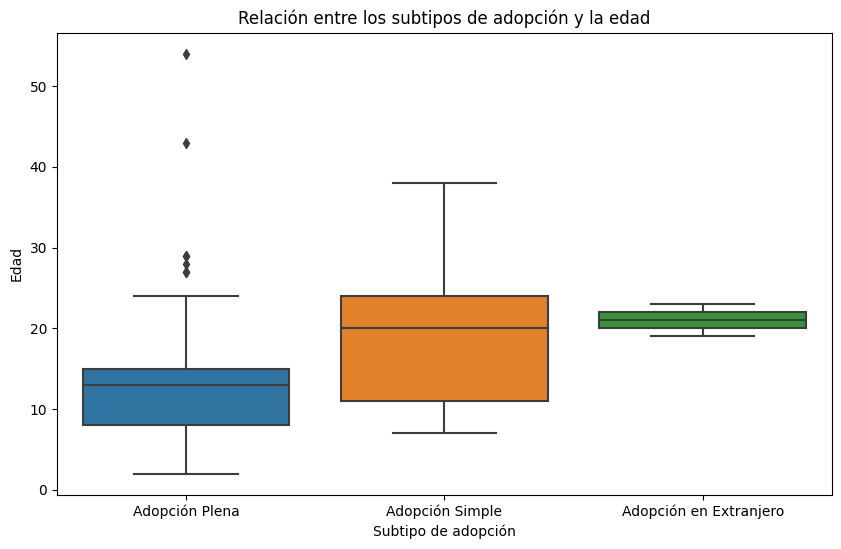

In [ ]:
# Gráfico de caja

plt.figure(figsize=(10, 6))
sns.boxplot(x='subtipo_adopcion', y='edad', data=data)
plt.title('Relación entre los subtipos de adopción y la edad')
plt.xlabel('Subtipo de adopción')
plt.ylabel('Edad')
plt.show()

**Ejercicio 7**

**¿Se pueden reducir las dimensiones?**

Creo que pueden reducirse las dimensiones, eliminando algunas columnas que no resultan tan relevantes para el análisis: "FECHA_INSCRIPCION" y "FECHA_NACIMIENTO".

**¿Qué representan esas nuevas variables?**

Esas nuevas variables resultan oportunas para el análisis: "GENERO", "EDAD" y "SUBTIPO ADOPCION".


In [ ]:
# Reduzco las columnas del dataset

columnas_a_eliminar = ["fecha_inscripcion", "fecha_nacimiento"]

# Eliminar las columnas
data_reducido = data.drop(columns=columnas_a_eliminar)

print(data_reducido)


       genero subtipo_adopcion  edad
0    Femenino   Adopción Plena    27
1   Masculino   Adopción Plena    16
2    Femenino  Adopción Simple    18
3    Femenino   Adopción Plena    13
4    Femenino   Adopción Plena    28
..        ...              ...   ...
87   Femenino   Adopción Plena    43
88   Femenino  Adopción Simple    23
89  Masculino  Adopción Simple    20
90   Femenino   Adopción Plena     6
91  Masculino   Adopción Plena     5

[92 rows x 3 columns]


# PALABRAS FINALES

Soy consciente de que analicé un dataset pequeño, de pocas variables. No obstante, me sirvió para llevar a la práctica mi objetivo profesional: "APLICAR LA CIENCIA DE DATOS EN LA ABOGACÍA".

Tal como mencioné en la **aclaración** del inicio, en los sitios oficiales de "datos abiertos" (de diversas jurisdicciones) encontré datasets de temáticas sumamente interesantes (relevantes para mi objetivo); sin embargo, al bajar los mismos aparecieron problemas (de incompatibilidad de los archivos), por ello, tuve que desistir en su análisis.

Muchas gracias por brindarnos la posibilidad de realizar este curso y por la dedicación de cada uno de los docentes y de los colaboradores.

Sé que es solo el comienzo y espero continuar capacitándome en el futuro.



        **Alumna**: María Inés Abarrategui Fernández
https://github.com/minesaba